In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

from src.download_roads_data import get_roads_from_osmnx
from src.s2_grid import split_polygon

In [2]:
pictures = gpd.read_file("../data/S2_GRID.geojson")
noise = gpd.read_file("../data/NOISE.geojson")
transport_lines = gpd.read_file("../data/TRANSPORT_LINES.geojson")
noise_barriers_1 = gpd.read_file('../data/NOISE_BARRIERS.geojson')
noise_barriers_2 = gpd.read_file('../data/NOISE_BARRIERS_2.geojson')
noise_barriers_1.drop(columns='ID_CLONA', inplace=True)
noise_barriers_2.drop(columns='ID_VAL', inplace=True)
noise_barriers = pd.concat([noise_barriers_1, noise_barriers_2]).reset_index(drop = True)
parks = gpd.read_file('../data/PARKS.geojson')
buildings = gpd.read_file('../data/BUILDINGS.geojson')
population = gpd.read_file('../data/DEMOGRAPHY.geojson')
roads = get_roads_from_osmnx()


noise_bounds = noise.unary_union

transport_lines = gpd.clip(transport_lines, noise_bounds)
roads = gpd.clip(roads, noise_bounds)
noise_barriers = gpd.clip(noise_barriers, noise_bounds)

## Przykładowe wykresy

In [3]:
noise_bounds_gdf = gpd.GeoDataFrame(geometry=[noise_bounds], crs = population.crs)

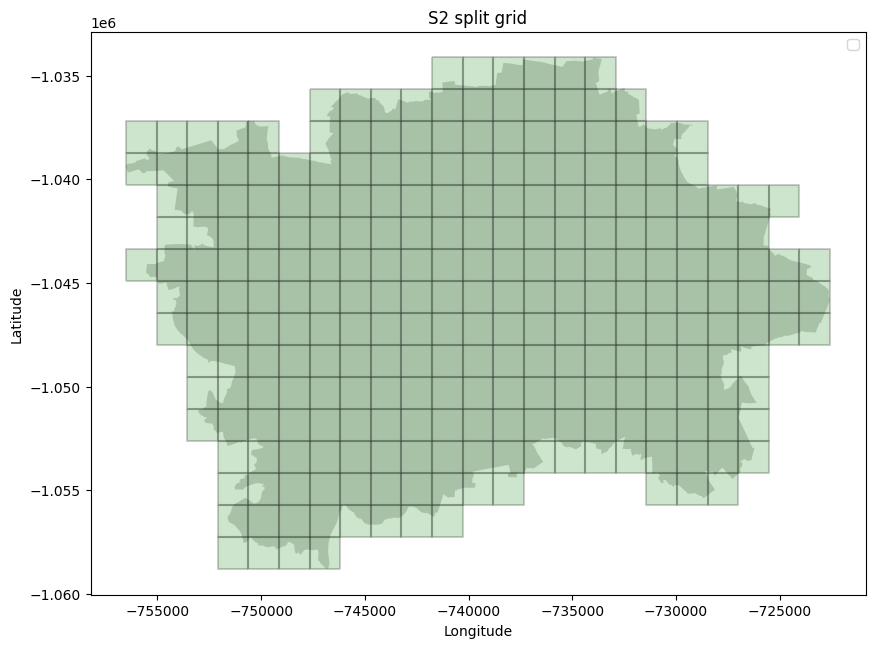

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))


noise_bounds_gdf.plot(ax=ax, alpha = 1, color="lightgray")
pictures.plot(ax=ax, alpha = 0.2, color="green",edgecolor="black", linewidth=1.5)
ax.legend()
ax.set_title("S2 split grid")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [5]:
pixels = gpd.read_file("../data/pictures/picture_50.geojson")
noise_for_pixel = gpd.clip(noise, pixels.geometry)
roads_for_picture = gpd.clip(roads, pixels.geometry)
transport_lines_for_picture = gpd.clip(transport_lines, pixels.geometry)
buildings_for_picture = gpd.clip(buildings, pixels.geometry)
bariers_for_picture = gpd.clip(noise_barriers, pixels.geometry)
parks_for_picture = gpd.clip(parks, pixels.geometry)

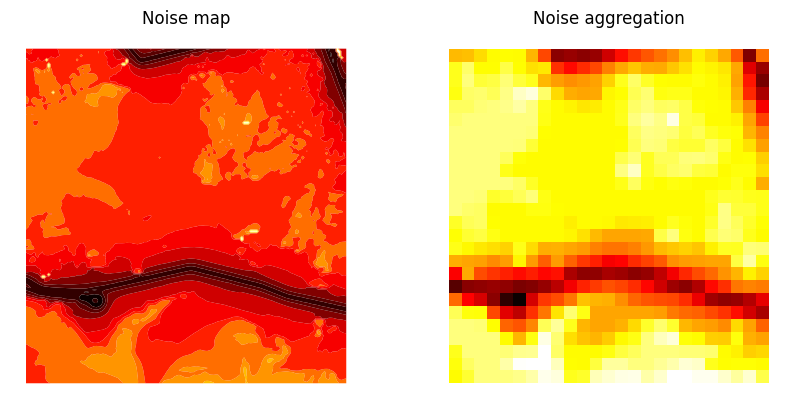

In [6]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10))

noise_for_pixel.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=1,
    ax=ax[0],
)

pixels.plot(column='weighted_db_hi', ax=ax[1],
            cmap="hot_r", linewidth=0.0, edgecolor="0.8")


# Add title and labels
ax[0].set_title("Noise map")
ax[1].set_title("Noise aggregation")
ax[0].axis("off")
ax[1].axis("off")

# Show the map
plt.show()

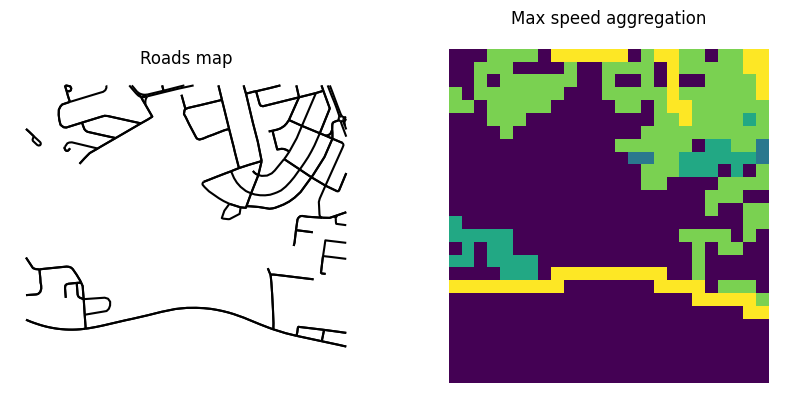

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10))

roads_for_picture.plot(ax=ax[0], alpha = 1, color="black", linewidth=1.5)

pixels.plot(column='max_speed', ax=ax[1],
            cmap="viridis", linewidth=0.0, edgecolor="0.8")


# Add title and labels
ax[0].set_title("Roads map")
ax[1].set_title("Max speed aggregation")
ax[0].axis("off")
ax[1].axis("off")

# Show the map
plt.show()

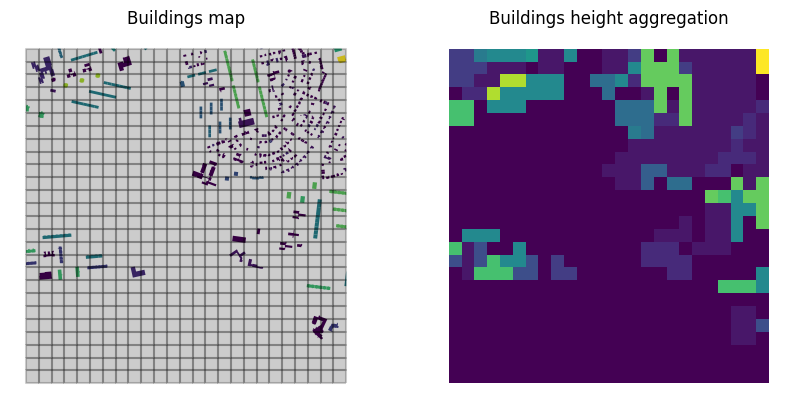

In [8]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10))


pixels.plot(
    column='buildings_levels',
    cmap="viridis",
    ax=ax[1],
    linewidth=0.0,
    edgecolor="0.8"
)

buildings_for_picture.plot(
    column="buildings_levels",
    cmap="viridis",
    linewidth=0.0,
    alpha=1,
    ax=ax[0],
)

pixels.plot(ax=ax[0], alpha = 0.2, color="black",edgecolor="black", linewidth=1.5)

ax[0].set_title("Buildings map")
ax[1].set_title("Buildings height aggregation")
ax[0].axis("off")
ax[1].axis("off")

plt.show()

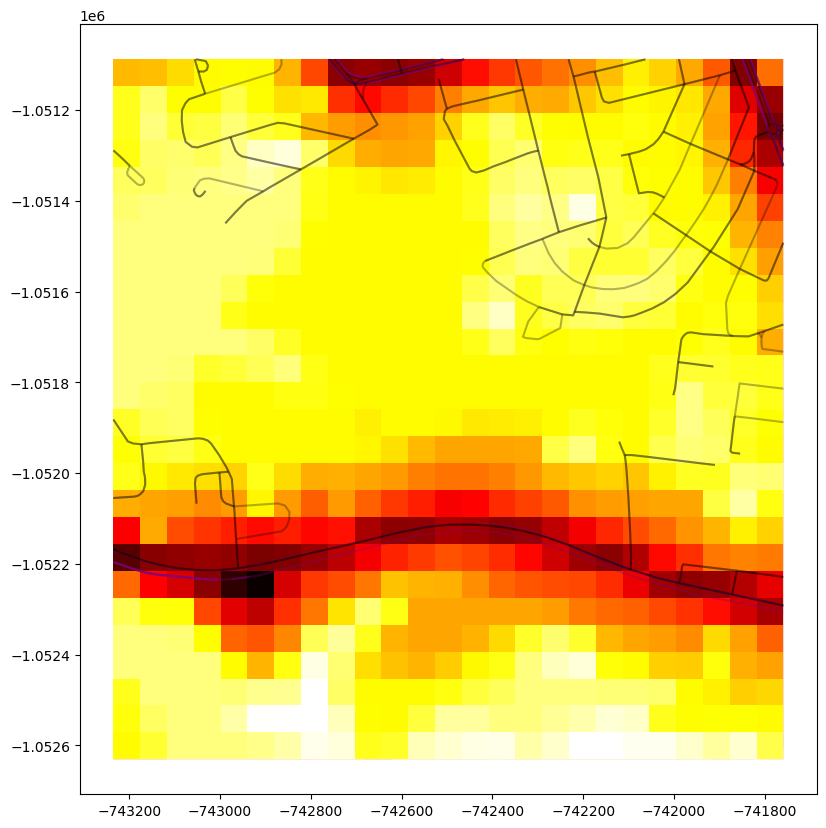

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))

noise_for_pixel.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.5,
    ax=ax,
)
transport_lines_for_picture.plot(ax=ax, alpha = 0.3, color="purple",edgecolor="purple", linewidth=1.5)

roads_for_picture.plot(ax=ax, alpha = 0.3, color="black",edgecolor="black", linewidth=1.5)
pixels.plot(column='weighted_db_hi', ax=ax,
            cmap="hot_r", linewidth=0.0, edgecolor="0.8", alpha = 1)

plt.show()

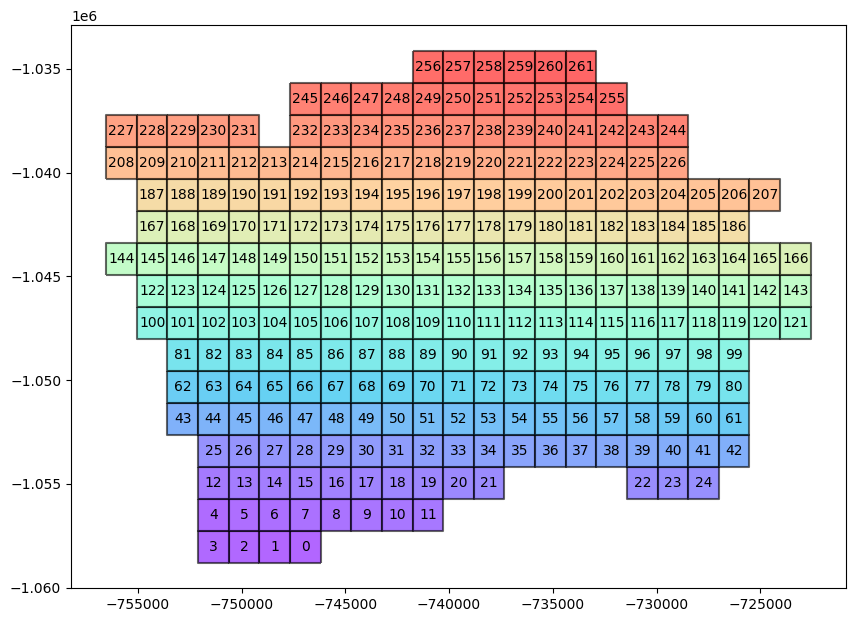

In [10]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate colors using a colormap (rainbow)
num_pictures = len(pictures)
colors = cm.rainbow(np.linspace(0, 1, num_pictures))  # Create a rainbow gradient

# Plot the entire GeoDataFrame with colors
pictures.plot(ax=ax, color=colors, linewidth=1.5, alpha=0.6, edgecolor="black")

# Add row numbers as labels inside polygons
for i, row in pictures.iterrows():
    centroid = row.geometry.centroid  # Get the centroid of the polygon
    ax.text(centroid.x, centroid.y, str(i), fontsize=10, ha='center', va='center', color="black")

# Show the plot
plt.show()